# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2021W2/tree/main/lectures) 

**Due date: Monday Jan 24, 2022 at 11:59pm**

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [49]:
spotify_df = pd.read_csv("data.csv").iloc[:, 1:]
spotify_df.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Excluding the target, how many columns (potential features) does the dataset include?

15

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [50]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)
print(f"df_train size: {df_train.shape}")
print(f"tf_test size: {df_test.shape}")

df_train size: (1613, 16)
tf_test size: (404, 16)


1613 Training examples and 404 testing examples

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [51]:
df_train_summary = df_train.describe()
df_train_summary

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


In [52]:
df_train_range = df_train_summary.apply(lambda x: x["max"] - x["min"])
print(f"{df_train_range.idxmax()}: {df_train_range.max()}")

duration_ms: 988585.0


The `duration_ms` column has the largest range of 988,585 because it has values that range from 1.6x10^4 to 1x10^4

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [53]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

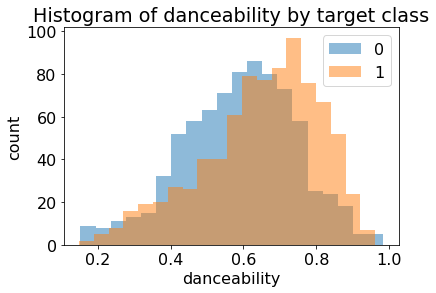

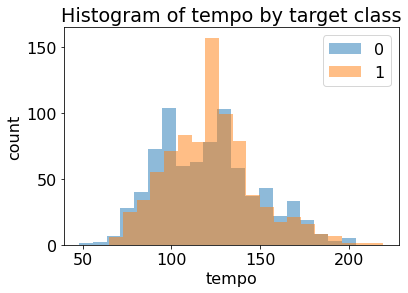

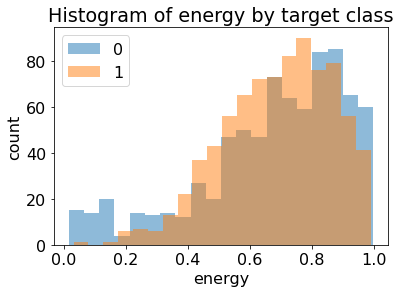

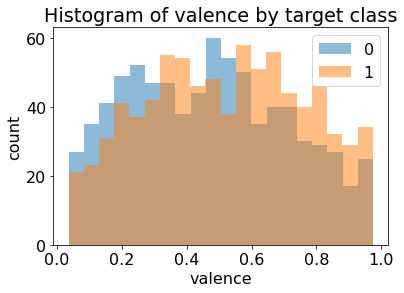

In [54]:
cols = ["danceability", "tempo", "energy", "valence"]

for col in cols:
    plt.title(f"Histogram of {col} by target class")
    plt.hist(negative_examples[[col]], alpha = 0.5, label="0", bins=20)
    plt.hist(positive_examples[[col]], alpha = 0.5, label="1", bins=20)
    plt.xlabel(col)
    plt.ylabel("count")
    plt.legend()
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

A reasonable split would be to predict 1 if >= 0.7 otherwise predict 0.

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



If the 2 histograms are completely identical it will not base useful for predicting the target class because there would be no clear boundary that can reasonably seperate the two classes.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [55]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

These features would not be useful when predicting using decision trees. Fore very example of a good feature, we were able to bin them and observe some good boundary. When dealing with qualitative data we wouldn't be able to group names in a meaningful way that allows for a boundary.

Some difficulties of using qualitative data with decision trees is the lack of comparison. For example, how would we know if "Trap Queen" > "Feel This Moment"? A lexilogical approach wouldn't make sense because users would probably not prefer one song over another based on their alphabetic order. 

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [56]:
X_train = df_train.drop(["song_title", "artist", "target"], axis = 1)
y_train = df_train[["target"]]
X_test = df_test.drop(["song_title", "artist", "target"], axis = 1)
y_test = df_test[["target"]]

model = DecisionTreeClassifier()
model.fit(X = X_train, y = y_train)


DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

In [57]:
tenth_example = X_train.iloc[[9]]
correct_target = y_train.iloc[9]["target"]
predicted_target = model.predict(X=tenth_example)
print(f"The model predicted: {predicted_target[0]} and the actual target was: {correct_target}")

The model predicted: 1 and the actual target was: 1


It is correct. The model predicted 1 and the actual target was 1 for the 10th example.

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [58]:
cvs_accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
cvs_accuracy

array([0.68518519, 0.66049383, 0.67901235, 0.72670807, 0.73913043,
       0.62111801, 0.73291925, 0.72049689, 0.63354037, 0.69565217])

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [59]:
cv_accuracy = cross_validate(estimator=model, X=X_train, y=y_train, cv = 10, return_train_score=True)
cv_df = pd.DataFrame(cv_accuracy)[["test_score", "train_score"]]
cv_df

,test_score,train_score
0,0.679012,0.999311
1,0.623457,0.998622
2,0.648148,0.999311
3,0.720497,0.998623
4,0.745342,0.998623
5,0.602484,0.998623
6,0.745342,0.998623
7,0.745342,0.999311
8,0.658385,0.999311
9,0.714286,0.998623


The cross-validation accuracies are not the same. For cross validation there is a little bit of randomness that goes into selecting which observations will be the the validation set of each fold. Just because both cv = 10 does not guarentee the same observations are in the validation/test of each fold.

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Yes, Because we didn't specify the depth of the decision tree we overfit the model to the trianing data which leads to a model that doesn't generalize well to unseen data.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

A decision tree of max depth = infinity is not very trustworthy. We can see this because the test score values greatly differ from the train_score values. This tells us that we're significantly overfitting.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [60]:
# Adapted from lecture 3:
results_dict = {
    "depth": [],
    "mean_train_error": [],
    "mean_cv_error": [],
    "std_cv_error": [],
    "std_train_error": [],
}
param_grid = {"max_depth": np.arange(1, 25)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_error"].append(1 - np.mean(scores["test_score"]))
    results_dict["mean_train_error"].append(1 - np.mean(scores["train_score"]))
    results_dict["std_cv_error"].append(scores["test_score"].std())
    results_dict["std_train_error"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
results_df

,mean_train_error,mean_cv_error,std_cv_error,std_train_error
depth,,,,
1,0.354481,0.358937,0.032643,0.003551
2,0.282014,0.289495,0.020348,0.002459
3,0.268375,0.290112,0.034676,0.006304
4,0.235655,0.265980,0.029800,0.005880
5,0.207342,0.289491,0.037506,0.010273
6,0.176826,0.285772,0.047420,0.008903
7,0.142040,0.288252,0.026880,0.004194
8,0.113040,0.284518,0.044370,0.006612
9,0.085211,0.286366,0.040038,0.007405


In [61]:
print(f"CV error is minimized when depth={results_df['mean_cv_error'].idxmin()} w/ an accuracy of {results_df['mean_cv_error'].min()}")

CV error is minimized when depth=4 w/ an accuracy of 0.2659803696035581


<AxesSubplot:xlabel='depth'>

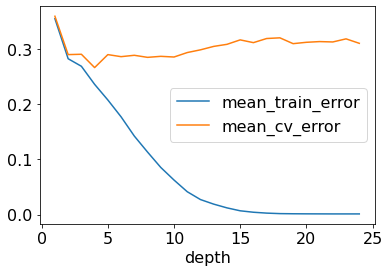

In [62]:
results_df.head()
results_df[["mean_train_error", "mean_cv_error"]].plot()

The larger the depth the more accurate the training error will be. Comparatively, cv errors dips down [1,4] then steadly goes up as the depth increases. This is because the introduction to unnecesary rules in a decision tree may have only be useful in edge cases from the training data that doesn't generalize well to unseen data. Based on the graph, I believe depth = 4 is where the cross_validation score is minimized. 

If other user's spotify data follow the same trends as the data used to tune for the hyperparameters, max_depth = 4 should yield similar results.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [63]:
opt_model = DecisionTreeClassifier(max_depth=4)
opt_model.fit(X = X_train, y = y_train)
1 - opt_model.score(X = X_test, y = y_test)

0.306930693069307

The error on the test data was 0.307 while the cross validation error was 0.267. Because both errors are fairly similar to one another, this indicates there isn't much overfitting occuring.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

```
if col1 < 5.5:
    predict false
else:
    predict true
```
1. TODO: ask if this is the correct cases.
We would predict [false, false false, true, true, true]
2. The accuracy would be 5/6
3. We cannot obtain 100% accuracy since a single stump means we can only use 1 inequality to make the two classes seperable.
Column 1:
y = -1 when X = {2, 4, 5, 10}
y = 1 when X = {9}
Because 9 is between 5 and 10 there's no inequality that could have 9 be on 1 side and 5,10 on the other.
Column 2:
y = -1 when X = {2, 3, 10}
y = 1 when X = {-1 9}
Similar case here. On example is 9 is between 3 and 10.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 